##Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


##Loading the dataset

In [3]:
data = pd.read_csv('Student_Marks.csv')

##Glimpse fo the data loaded

In [4]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


##Checking the number of rows and columns in the dataset

In [6]:
data.shape

(100, 3)

In [7]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


##Checking for the null/missing values in the dataset

In [9]:
df.select_dtypes(include=['object', 'category']).columnsdata.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

###To identify categorical variables, we can examine the data types of each column in the DataFrame. Columns with data type object or category are likely categorical variables.

In [10]:
data.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

###Initiating the gradient boosting regressor model

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
X = data.drop('Marks', axis=1)
y = data['Marks']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Defining the preprocessing steps

In [16]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


In [17]:
model = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('regressor', GradientBoostingRegressor())])


## Defining the cross-validation strategy

In [18]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Defining the hyper-parameter grid

In [19]:
param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

### Performing hyper-parameter tuning using GridSearchCV

In [20]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer()),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

### Getting the best hyper-parameters

In [21]:
best_params = grid_search.best_params_
print("Best Hyper-parameters:")
print(best_params)

Best Hyper-parameters:
{'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


#### Getting the best model

In [22]:
best_model = grid_search.best_estimator_

### Evaluating the best model

In [23]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1739219551536793


##Initiating the XGBoost regressor model

In [24]:
import xgboost as xgb

best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 100
}

# Initialize XGBoost regressor with the tuned hyper-parameters
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                           learning_rate = best_params['learning_rate'],
                           max_depth = best_params['max_depth'],
                           min_child_weight = best_params['min_child_weight'],
                           subsample = best_params['subsample'],
                           colsample_bytree = best_params['colsample_bytree'],
                           n_estimators = best_params['n_estimators'])


In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Fitting the model to the training data

In [26]:
xg_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Predicting on the test set

In [27]:
y_pred = xg_reg.predict(X_test)

### Calculating evaluation metrics

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1.0927588363647458
Mean Squared Error: 1.9595281507229578
Root Mean Squared Error: 1.3998314722576277


## Visualizing actual vs. predicted values

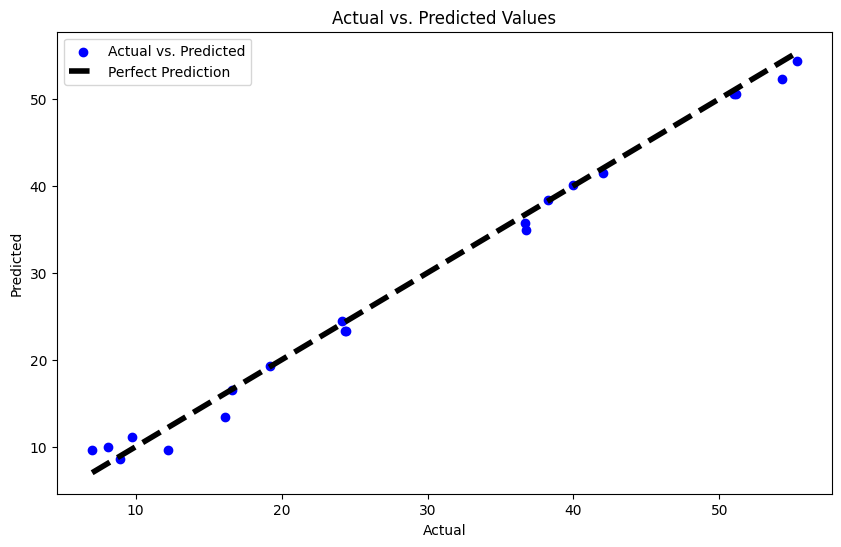

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()